In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
!pip install scikit-learn

In [5]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.info())
print(df.describe())
print(df['Attrition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.duplicated().sum()

0

In [11]:
df.columns=df.columns.str.lower()
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


EXPLORATOTY DATA ANALYSIS (EDA)

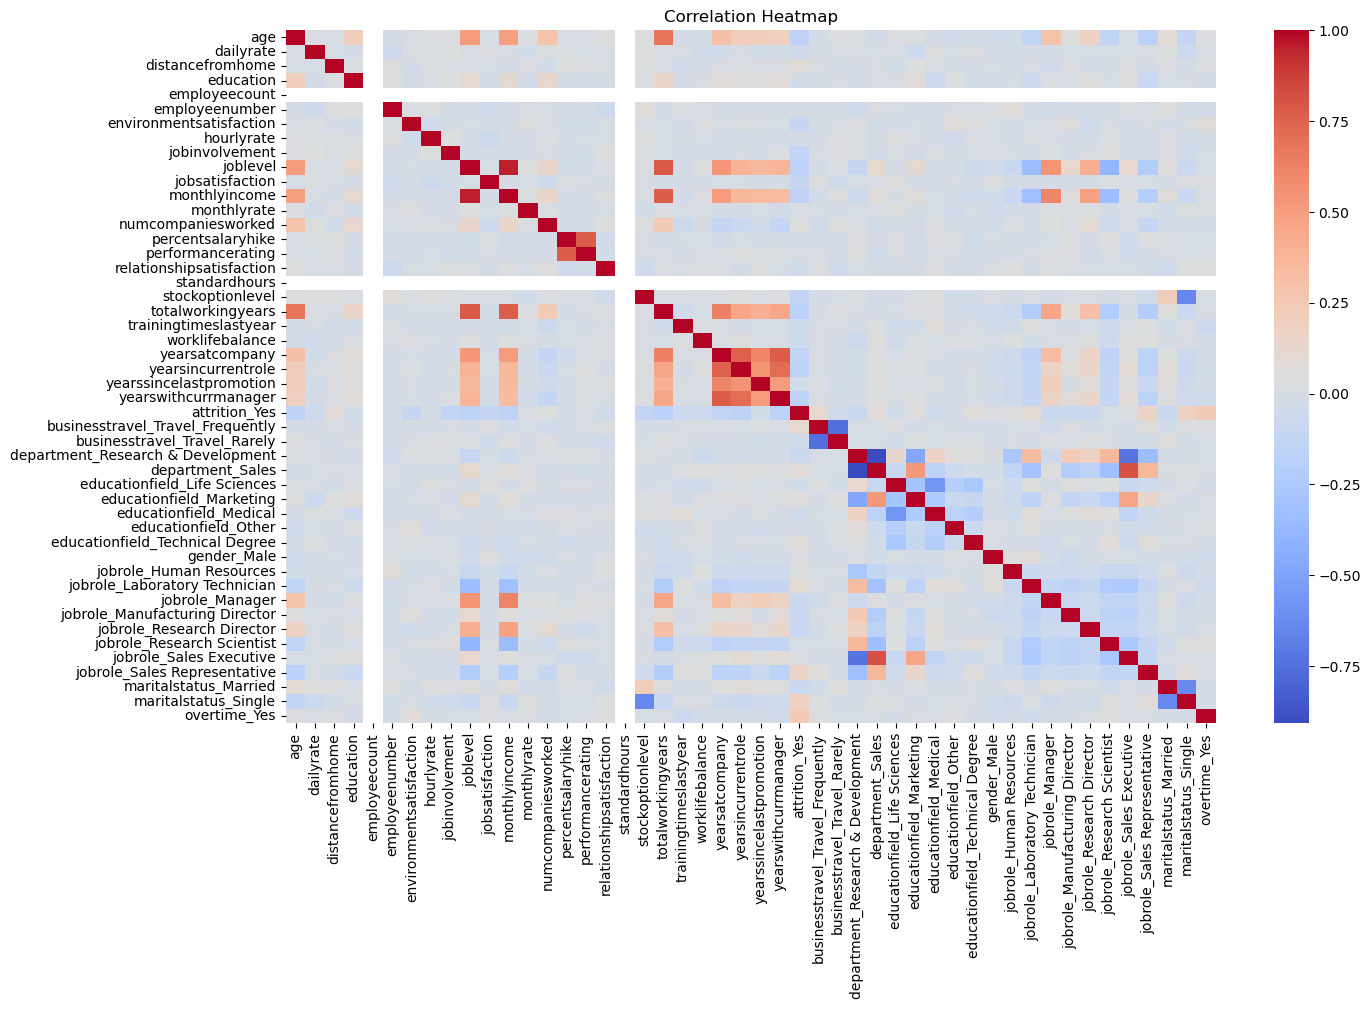

In [22]:
df_encoded = pd.get_dummies(df, drop_first = True)
plt.figure(figsize=(15,9))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

DEPARTMENT WISE ATTIRITION

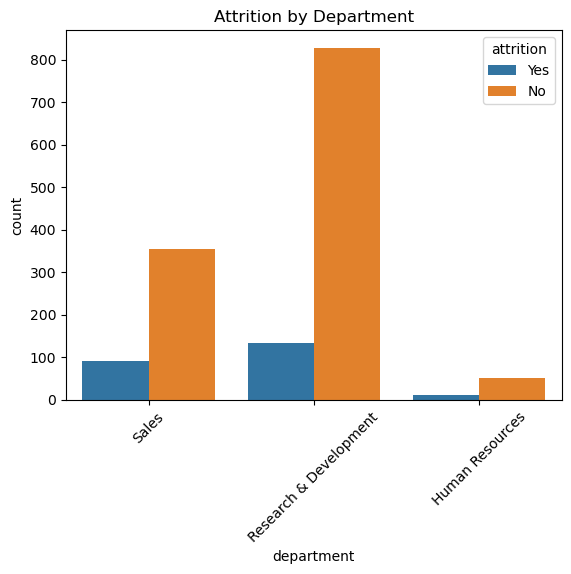

In [25]:
sns.countplot(x="department",hue="attrition", data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

PREPROCESSING FOR MODELLING

In [28]:
#LABEL ENCODE TARGET IF IT'S 'YES/NO'
df['attrition']=df['attrition'].map({'Yes': 1, 'No' : 0})

#ONE-HOT ENCODE CATEGORICAL VARIABLES
df_encoded=pd.get_dummies(df, drop_first=True)

#Split into x and y
x = df_encoded.drop('attrition',axis=1)
y = df_encoded['attrition']

Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Train Models 

Random Forest

In [45]:
from sklearn.metrics import classification_report

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest ;\n",
      classification_report(y_test,y_pred_rf))

Random Forest ;
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294



USING SMOTE TO BALANCE DATA

In [50]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

RETAIN RANDOM FOREST ON SMOTE DATA

In [55]:
rf_model=RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train_smote, y_train_smote)
y_pred_rf=rf_model.predict(x_test)


print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.61      0.36      0.45        39

    accuracy                           0.88       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.87      0.88      0.87       294



EXPORTING ENCODED DATA 

In [58]:
df_encoded.to_csv("hr_cleaned.csv", index=False)

In [65]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
